In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
  df.duplicated().sum()

1081

In [7]:
  df=df.drop_duplicates()

In [8]:
 df.duplicated().sum()

0

# Preprocesamiento

In [9]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df['Time']=scaler.fit_transform(df['Time'].values.reshape(-1,1))
df['Time']

0        -0.995290
1        -0.995290
2        -0.995279
3        -0.995279
4        -0.995267
            ...   
284802    1.035258
284803    1.035270
284804    1.035282
284805    1.035282
284806    1.035329
Name: Time, Length: 283726, dtype: float64

In [10]:
df['Amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Amount']

0         1.774718
1        -0.268530
2         4.959811
3         1.411487
4         0.667362
            ...   
284802   -0.295230
284803    0.038798
284804    0.638020
284805   -0.166875
284806    2.711723
Name: Amount, Length: 283726, dtype: float64

In [11]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Class 0: 99.83328986416473
Class 1: 0.1667101358352777


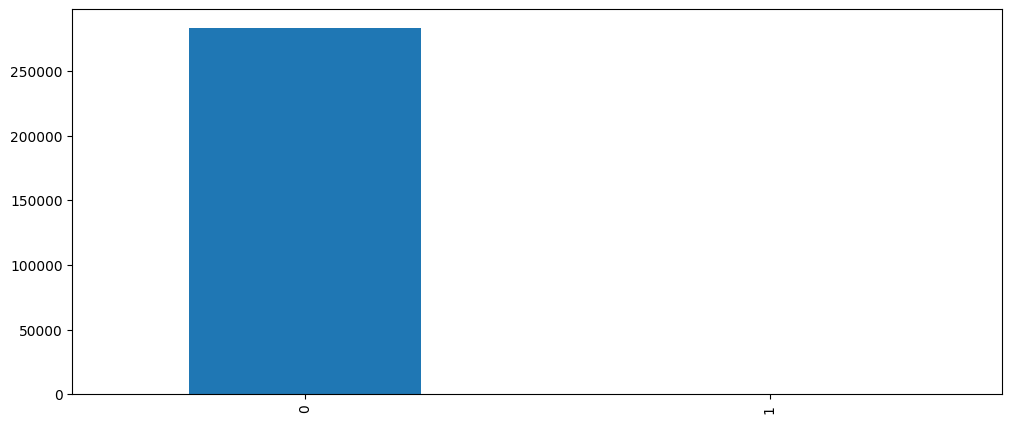

In [12]:
df['Class'].value_counts().plot(kind='bar',figsize=(12,5))

print('Class 0: {}'.format(100*(df['Class'].value_counts()[0]/len(df))))
print('Class 1: {}'.format(100*(df['Class'].value_counts()[1]/len(df))))

# Modelo SIN SMOTE

In [13]:
#Aplicamos los modelos sin usar SMOTE para balancear el dataset

from sklearn.model_selection import train_test_split
(train,test) = train_test_split(df,test_size=0.2,stratify=df['Class'])

In [14]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
255697,0.853893,2.029879,-0.808041,-1.018450,-1.098287,-0.764206,-1.063618,-0.276707,-0.276191,2.414197,...,0.255912,1.291648,-0.146783,0.183489,0.449414,0.168259,0.018372,-0.058971,0.042692,0
92181,-0.245360,-0.466278,1.043913,1.682477,-0.105909,-0.071912,-0.675702,0.643274,0.038517,-0.745770,...,-0.157570,-0.402975,-0.016682,0.530222,-0.234656,0.039424,0.265301,0.113862,-0.270060,0
204441,0.594507,0.138858,0.973060,-1.616431,-0.241078,0.748921,-0.485907,0.808028,0.198814,-0.218607,...,0.316420,0.767110,0.022183,-0.045114,-0.104883,-0.143470,-0.096701,-0.038576,0.879572,0
222623,0.685900,0.171826,0.926505,-0.714985,-0.679503,1.109120,-0.457731,0.959702,-0.027671,0.115658,...,-0.386058,-1.023373,0.057613,-0.095748,-0.355844,0.155042,0.211258,0.076916,-0.060353,0
14245,-0.697946,-0.582277,1.380866,-0.467419,1.171244,2.860825,3.839771,0.485358,0.491590,-1.030304,...,-0.035400,-0.193005,-0.136341,0.989023,0.035909,0.025162,-0.564525,-0.127212,-0.078292,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210795,0.627894,0.648487,0.948910,-1.669776,0.098742,1.042193,-1.419944,2.393929,-1.042653,-0.450720,...,0.512626,1.957509,-0.092696,0.090672,-1.217192,-0.103230,0.084507,0.090785,1.068558,0
94897,-0.230506,1.076307,0.030010,1.496884,2.360151,-0.890809,0.512339,-0.933860,0.428887,-0.052105,...,0.251066,0.573284,-0.069628,-0.031010,0.200016,0.117391,0.027903,0.027359,-0.041580,0
54420,-0.449513,-1.512578,-0.725894,1.280591,-3.294910,-0.884636,-0.185174,-0.200036,0.649712,-0.395900,...,-0.141190,-0.316670,-0.012499,-0.333569,0.471386,-0.084159,-0.092395,-0.078263,1.387985,0
16197,-0.670823,1.321496,-1.270237,-0.193735,-1.496061,-1.029072,-0.234149,-0.745866,-0.027701,-2.197134,...,-0.106887,-0.134215,-0.115189,-0.324930,0.444876,-0.119006,0.000703,0.008017,1.033931,0


In [15]:
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
185827,0.495274,-0.430474,1.633803,0.251501,4.087646,1.234531,2.352262,-0.002498,0.971683,-2.348041,...,0.512002,1.734027,-0.197231,-1.569837,-0.616840,0.728333,0.404288,0.178927,-0.158253,0
159353,0.325754,-0.009891,1.048546,0.157673,-0.294516,0.624085,-0.814025,0.998441,-0.219291,-0.134374,...,0.394396,1.433852,-0.176518,1.139284,-0.415372,-0.459383,0.503152,0.298123,-0.292032,0
130324,-0.063007,-2.420392,0.678242,2.841178,3.444733,-1.549533,1.289481,-1.091299,0.725531,0.835160,...,0.092869,0.803202,-0.088271,0.447201,0.236359,0.482724,-0.662263,0.376141,0.220136,0
34902,-0.550167,-0.341962,0.692407,1.509486,0.678312,-0.001552,0.178685,0.526486,0.153548,-0.602140,...,0.068282,0.376536,-0.055967,0.279362,-0.402691,0.429064,0.128994,0.130801,0.091781,0
21543,-0.622405,-0.773603,0.825051,0.842706,-0.457340,0.692415,0.428504,0.790100,-0.933334,-0.400990,...,0.513799,-0.735214,-0.313236,-1.029849,-0.181670,0.163052,0.263018,-0.074346,1.136142,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232210,0.733155,-1.125975,0.713643,0.936648,-0.945188,0.850745,0.504104,1.026554,-0.256325,0.413091,...,-0.539070,-1.042465,-0.273531,-0.014469,0.416124,0.182108,-0.314687,-0.242709,0.979975,0
233161,0.737679,2.041282,0.239564,-1.586471,1.387778,0.416688,-1.156498,0.623412,-0.407746,0.229838,...,0.043877,0.363025,0.006150,-0.012935,0.454392,-0.488165,-0.014587,-0.063557,-0.278125,0
205798,0.602004,-1.346576,2.242447,-1.084930,0.060260,-0.652911,0.981190,-3.975861,-10.622246,-0.825643,...,-5.269241,0.941276,0.765915,-0.069651,0.182483,-0.543325,0.025115,0.403437,-0.240022,0
226095,0.702776,2.035787,-1.202438,-0.519710,-0.937306,-1.133526,-0.298209,-1.078539,0.098972,-0.001164,...,0.009044,-0.142185,0.311389,-0.449084,-0.553092,-0.480655,-0.004215,-0.047938,0.510221,0


In [16]:
train_x=train.iloc[:,:-1].values
train_y=train.iloc[:, -1].values

x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values


# Regresion Logistica SIN SMOTE

In [17]:
from sklearn.linear_model import LogisticRegression
before_lr = LogisticRegression()
before_lr.fit(train_x,train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
before_y_pred_lr = before_lr.predict(x_test)

# KNN SIN SMOTE

In [19]:
from sklearn.neighbors import KNeighborsClassifier
before_knn = KNeighborsClassifier(n_neighbors = 5)
before_knn.fit(train_x, train_y)

KNeighborsClassifier()

In [20]:
before_y_pred_knn = before_knn.predict(x_test)

# **Aplicamos SMOTE para balancear el dataset**

In [21]:
from imblearn.over_sampling import SMOTE

x_resampled,y_resampled=SMOTE().fit_resample(train_x,train_y)


In [22]:
x_resampled

array([[ 0.85389264,  2.02987939, -0.80804077, ...,  0.01837203,
        -0.05897113,  0.04269225],
       [-0.24536024, -0.46627777,  1.04391319, ...,  0.26530059,
         0.11386208, -0.2700598 ],
       [ 0.59450661,  0.13885771,  0.97305991, ..., -0.09670119,
        -0.03857616,  0.87957169],
       ...,
       [-0.9066305 ,  0.32735373,  3.72929664, ...,  0.52852201,
         0.40414211, -0.29203171],
       [-0.1593292 , -3.88574693,  1.23063248, ..., -1.25117945,
         0.42950115,  0.87095634],
       [ 0.58509702,  0.83183404,  2.10891227, ...,  0.33833516,
         0.0109339 , -0.14099424]])

In [23]:
y_resampled

array([0, 0, 0, ..., 1, 1, 1])

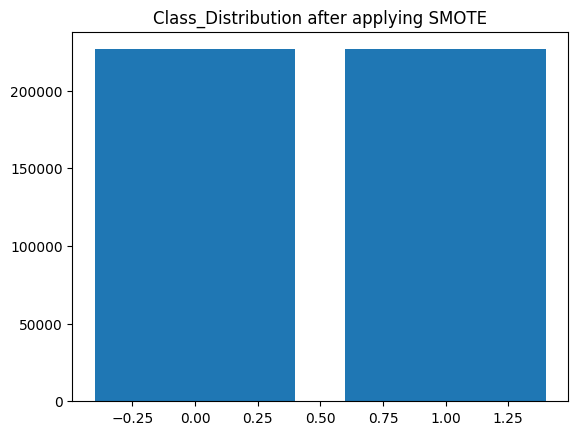

In [26]:
categories = [0,1]
values=[len(y_resampled[y_resampled==0]),len(y_resampled[y_resampled==0])]

plt.bar(categories,values)

plt.title('Class_Distribution after applying SMOTE')
plt.show()

# **Regresion Logistica con SMOTE**

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_resampled, y_resampled)

LogisticRegression()

In [29]:
y_pred_lr = lr.predict(test.iloc[:,:-1].values)

# **KNN con SMOTE **

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_resampled, y_resampled)

KNeighborsClassifier()

In [32]:
y_pred_knn = knn.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix (y_test,before_y_pred_lr)

array([[56640,    11],
       [   37,    58]])

In [35]:
confusion_matrix (y_test,before_y_pred_lr).ravel()



array([56640,    11,    37,    58])

In [38]:
tn, fp, fn, tp = confusion_matrix (y_test,before_y_pred_lr).ravel()

print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\n'.format(tn,fp,fn,tp))

True Negatives: 56640
False Positives: 11
False Negatives: 37
True Positives: 58



In [40]:
accuracy_score(y_test,before_y_pred_lr)*100

99.91541254009093

In [42]:
tn, fp, fn, tp = confusion_matrix (y_test,before_y_pred_knn).ravel()

print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\n'.format(tn,fp,fn,tp))

True Negatives: 56644
False Positives: 7
False Negatives: 21
True Positives: 74



In [43]:
accuracy_score(y_test,before_y_pred_knn)*100

99.95065731505305

In [45]:
tn, fp, fn, tp = confusion_matrix (y_test,y_pred_lr).ravel()

print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\n'.format(tn,fp,fn,tp))

True Negatives: 55051
False Positives: 1600
False Negatives: 6
True Positives: 89



In [46]:
accuracy_score(y_test,y_pred_lr)*100

97.16984457054242

In [47]:
tn, fp, fn, tp = confusion_matrix (y_test,y_pred_knn).ravel()

print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\n'.format(tn,fp,fn,tp))

True Negatives: 56554
False Positives: 97
False Negatives: 12
True Positives: 83



In [48]:
accuracy_score(y_test,y_pred_knn)*100

99.80791597645648